# Exercise Sheet 1: Neurons

In [159]:
import numpy as np
from scipy import constants
from matplotlib import pyplot as plt

## Task 1: The logistic function (1 point - programming)
Write a function "logistic(h,a=1)" resembling the logistic function and a second function "signtrafunc" the binary (sign-based) tranfer function. Also write a function "dlogistic(h,a=1)" resembling the derivative of the logistic function. Similarly, write a "gaussRBF(h,a=1)" resembling the gaussian Radial Basis Function and "dgaussRBF(h,a=1)" its derivative.

Plot each of them in the range of -10 to 10 together with their derivative (except for the sign-based function) with  matplotlibs plot function (plt.plot)).

For defining the sign-based transfer function the inline definition of functions using the syntax trafunc=lambda x: f(x) might be handy, please write the logistic function, however, as a classical function definition. The a=1 in the function definition sets the default to a=1 so the function needs only 1 argument by default.

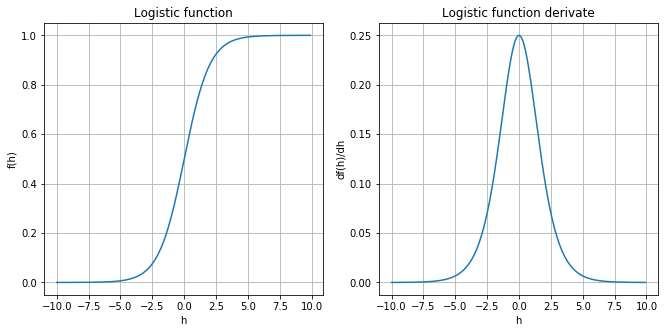

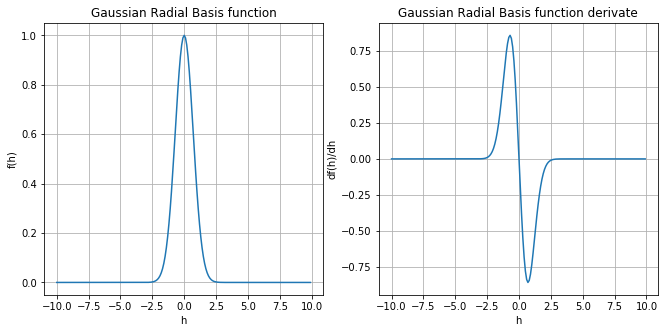

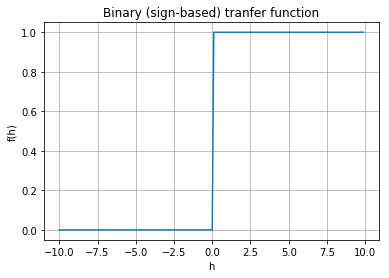

In [162]:
def plot_2func(x, y, d, title, tittle2, x_label1='h', y_label1= 'f(h)', x_label2= 'h', y_label2 ='df(h)/dh'):
    
    plt.figure(figsize= (11,5))
    ax1 = plt.subplot(121, )
    ax1.plot(x, y)
    plt.xlabel(x_label1)
    plt.ylabel(y_label1)
    plt.title(title)
    plt.grid()
    
    ax2 = plt.subplot(122)
    ax2.plot(x, d);
    plt.xlabel(x_label2)
    plt.ylabel(y_label2)
    plt.title(tittle2)   
    plt.grid()

def plot(x, y, title, x_label='h', y_label= 'f(h)'):
    
    plt.figure()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y)
    plt.grid()
    
def logistic(h,a=1):
    return 1/(1 + np.e**(-a*h))

def dlogistic(h,a=1):
    return (a*np.e**(-a*h))/((1+np.e**(-a*h))**2)

signtrafunc = lambda x: (np.sign(x) +1) /2

def gaussRBF(h, a=1):
    return np.e**(-(a*h)**2)
    
def dgaussRBF(h,a=1):
    return -2*a*h*np.e**(-a*h**2)

h = np.arange(-10, 10, 0.1)
plot_2func(h, logistic(h), dlogistic(h), "Logistic function", "Logistic function derivate")
plot_2func(h, gaussRBF(h), dgaussRBF(h), "Gaussian Radial Basis function", "Gaussian Radial Basis function derivate")
plot(h, signtrafunc(h), "Binary (sign-based) tranfer function")

## Task 2: Building an artificial neuron  (2 points - programming)
Define a class "neuron" resembling a simple perceptron. See https://docs.python.org/3/tutorial/classes.html for help on classes.

It should have the attributes "neuron.w" for the weights, "neuron.b" for the bias, the methods "neuron.trafunc(self,h)" for the transfer function, "neuron.dtrafunc(self,h)"  for the first derivative of the transfer function and the method "neuron.out(self,x)" to calculate the output for inputs *x* and *h* respectively. 

Build a constructor method "\__init\__(self,...)", where self refers to the object itself, which assigns the weight vector *x*, the bias *b* , the transfer function "trafunc" and it's derivative "dtrafunc" to the neuron.

The transfer function and its derivative should best be assigned at construction in order to acccount for different possible transfer functions.

In [176]:
class neuron:
    
    def __init__(self, w, b, func, dfunc = None):
        
        self.w = w
        self.b = b
        self.trafunc = func
        self.dtrafunc = dfunc
    
    def trafunc(self, h):
        return self.trafunc(h)
    
    def dtrafunc(self, h):
        return self.dtrafunc(h)
    
    def out(self, x):        
        
        return self.trafunc(np.sum(np.dot(self.w, x)) - b)
    

## Task 3: Use an artificial neuron (3 points - thinking and programming)
Use instances of the neuron class above to build the equivalents to logical "or" and "and"-functions using the binary (sign-based) transfer function and test them for 2-dimensional input vectors *x* resembling all possibilities of combinations ([0,0] [1,0], [0,1], [1,1]) by setting the weights and bias manually.

First, use the sign-based transfer function to solve the task with exact solution and then apply the same weights w and bias b on a neuron with the logistic and gaussian RBF transfer functions.

What's the difference?

*Hint: if you haven't succeeded with Task 2, you can solve Task 3 analytically and write down the needed weights and results.*

In [205]:
##Building a AND neuron with sign-based transfer function

w= [1, 1]
b= 1.5

neuron1=neuron(w,b,signtrafunc)
x_all_comb = np.array([[0,0], [1,0], [0,1], [1,1]])

print("AND neuron using sign-based transfer function: \n")
for x in x_all_comb:
    
    print(f'If x={x}, result = {neuron1.out(x)}')


##Building a OR neuron with sign-based transfer function

w_2= [1, 1]
b_2= 0.5

neuron2=neuron(w_2,b_2,signtrafunc)

print("\nOR neuron using sign-based transfer function: \n")
for x in x_all_comb:
    
    print(f'If x={x}, result = {neuron2.out(x)}')

    

AND neuron using sign-based transfer function: 

If x=[0 0], result = 0.0
If x=[1 0], result = 0.0
If x=[0 1], result = 0.0
If x=[1 1], result = 1.0

OR neuron using sign-based transfer function: 

If x=[0 0], result = 0.0
If x=[1 0], result = 0.0
If x=[0 1], result = 0.0
If x=[1 1], result = 1.0


The difference is that while the sign-based function model returns  a discrete result; the other returns a continuous one.

## Task 4: The electrical field strength (4 points - analytic derivation)
Analytically derive the electrical field strength $\vec{E}=-\nabla\phi$ of an electrostatic dipole field at origin in an inifinite homogeneous otherwise charge-free space step-by-step from the potential equation $\phi(\vec{r})=\frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^3}$ in Cartesian coordinates.

To this extent you will need to build the gradient $\nabla=\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)$!

You can take the dipolar moment $\vec{p}$ to be a constant vector $\vec{p}=\left(
\begin{array}{c}
	p_x\\
	p_y\\
	p_z
\end{array}
\right)$. 

The vector $\vec{r}=\left(
\begin{array}{c}
	x\\
	y\\
	z
\end{array}
\right)$ is the coordinates in cartesian coordinates and  the norm is the euclidean norm $\left|\vec{r}\right|=\sqrt{x^2+y^2+z^2}$.

*Hint: You can hand in the solution in your format of choice: Write direclty below (Markdown takes latex within $$, jsut double-click on the cell below), Pdf from Latex or Word, scan or photo of a hand-written derivation, etc....*

### Solution:
$\vec{E}=- \nabla \phi=$

## Task 5: Current density & potential of a single PSP (5 points - programming)
Write a python function resembling the electrical field potential $\phi(\vec{r},\vec{r}_q)$ and another one for the current density $\vec{J}$ of a current dipole in infinite homogeneous conductive space at point $\vec{r}_q$ in Cartesian coordinates. The function should take the position of the observed point $\vec{r}$, the position of the dipole $\vec{r}_q$, the current density produced by the source  $\vec{Q}$ and the conductivity $\sigma$ as inputs and return the resulting scalar potential/the current density of the volumce conduction, respectively.  $\vec{r}_q$ should be set to the origin by default. 

$\phi(\vec{r})=\frac{1}{4\pi\sigma}\frac{\vec{Q}\cdot\left(\vec{r}-\vec{r}_q\right)}{\left|\vec{r}-\vec{r}_q\right|^3}$

$\vec{J}=\frac{1}{4 \pi } \left(3 \frac{\left(\vec{r}-\vec{r}_q\right) \cdot \vec{Q}}{\left|\vec{r}-\vec{r}_q\right|^5} \cdot \left(\vec{r}-\vec{r}_q\right)-\frac{\vec{Q}}{\left|\vec{r}-\vec{r}_q\right|^3}\right)$

$\sigma$ is the specific conductivity of the material (a constant) and $\vec{Q}$ is the current density at the source (neuron). For brain tissue, the conductivity is around $\sigma=0.33\frac{S}{m}$.

Make a plot of the two variables in two dimensions from -10cm to 10cm for both axes in the x/y-plane for a dipole at origin with dipole moment $\vec{Q}=[20,0]fAm$.
Plot the potential using the matlpotlib function plt.contour for plotting and the current density using the function plt.streamplot. Draw both plots into the same figure.

Hints: 
- Numpy's tensordot might simplify the treatment of multiple positions at once.
- The arguments to the plot function call for $\vec{J}$- and $\phi$- values need the shape corresponding to the XX and YY variables from np.meshgrid.
- Increase the number of contours in plt.contour to get a nicer distribution of isopotential lines or better use a logarithmic scaling
- you may use contourf to add colors



In [ ]:
#initialize the variables (x and y in cm, p as a unit dipole with 1Cmm)
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
r_0=[0,0]
Q=np.array([20,0])*1e-15;

#create the meshgrid for calculation and plotting (in SI --> m)
XX,YY=np.meshgrid(x/100,y/100)


#Calculate the potential on the whole meshgrid 
phi=phi_dip([XX,YY],Q,r_0)
#Calculate the current source density on the whole meshgrid 
J=J_dip([XX,YY],Q,r_0)


// better to use logaritmic scaling
